<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220224_standardization_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 표준화(Standardization)
> 데이터 평균 → 0

> 데이터 표준편차 → 1

> 분포를 단순화 + 다른데이터와 비교 용이

In [4]:
print("표준화 공식")
Image(url='https://t1.daumcdn.net/cfile/tistory/999EC6335CDE8D8131', width=100)

표준화 공식


In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris['data'] # (150, 4) shape의 데이터, 4개의 feature로 구성됨
y = iris['target']

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
X = x[:, 0] # 첫번째 feature인 "sepal length의 데이터"만 선택해보자

In [23]:
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## X 배열 정규화

In [24]:
X_ = (X-X.mean()) / X.std() # std() : 표준편차

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


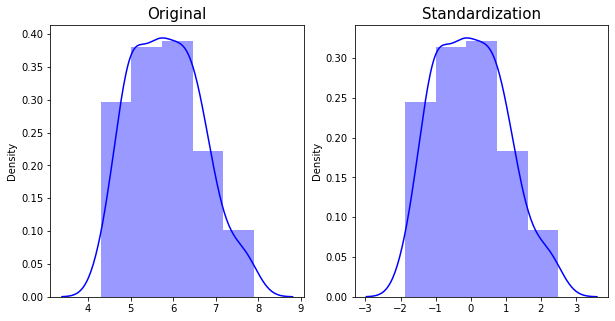

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b') # distribution plot, bins : 그래프 막대를 몇개로 나눌지
plt.title('Original', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='b')
plt.title('Standardization', fontsize=15)

plt.show()


# sklearn을 활용한 표준화(Standardization) 방법

In [28]:
from sklearn.preprocessing import StandardScaler # 표준화 = scale

In [32]:
scaler = StandardScaler()

In [39]:
x_scaled = scaler.fit_transform(x) # (150, 4) 배열 전체를 표준화

x_scaled[:5] # 첫 다섯줄만 보자

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [40]:
round(x_scaled.mean(), 2), x_scaled.std() # 평균과 표준편차 확인

(-0.0, 1.0)

### sns 그래프의 종류별 특징
> distplot()은 1개의 축(중복값 확인)
  - 1개의 축 표준화
  
> scatterplot()은 2개의 축
  - 2개의 축 표준화


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


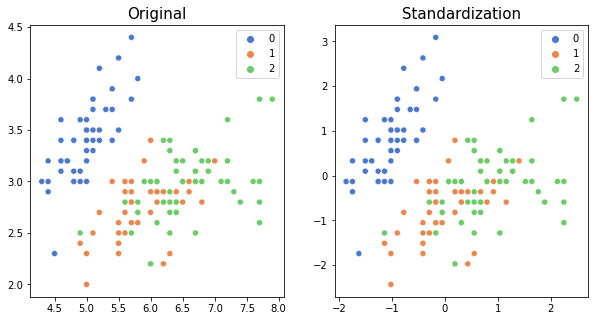

In [42]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x[:, 0], x[:,1], hue=y, palette='muted')
plt.title('Original', fontsize=15)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 0], x_scaled[:,1], hue=y, palette='muted')
plt.title('Standardization', fontsize=15)

plt.show()